This is a small practice project on Codecademy.

In [1]:
## import essential libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
## adjust display settings
pd.options.display.max_columns = 25
pd.options.display.max_colwidth = 600

In [3]:
## import dataset 
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [4]:
## check for missing values - Passed
## check for duplicates - Passed
# df[df.duplicated()]
## Convert winnng to thousan
df.Winnings = df.apply(lambda row: row.Winnings/1000, axis=1)

### Part 1: Exploratory Data Analysis

<AxesSubplot:>

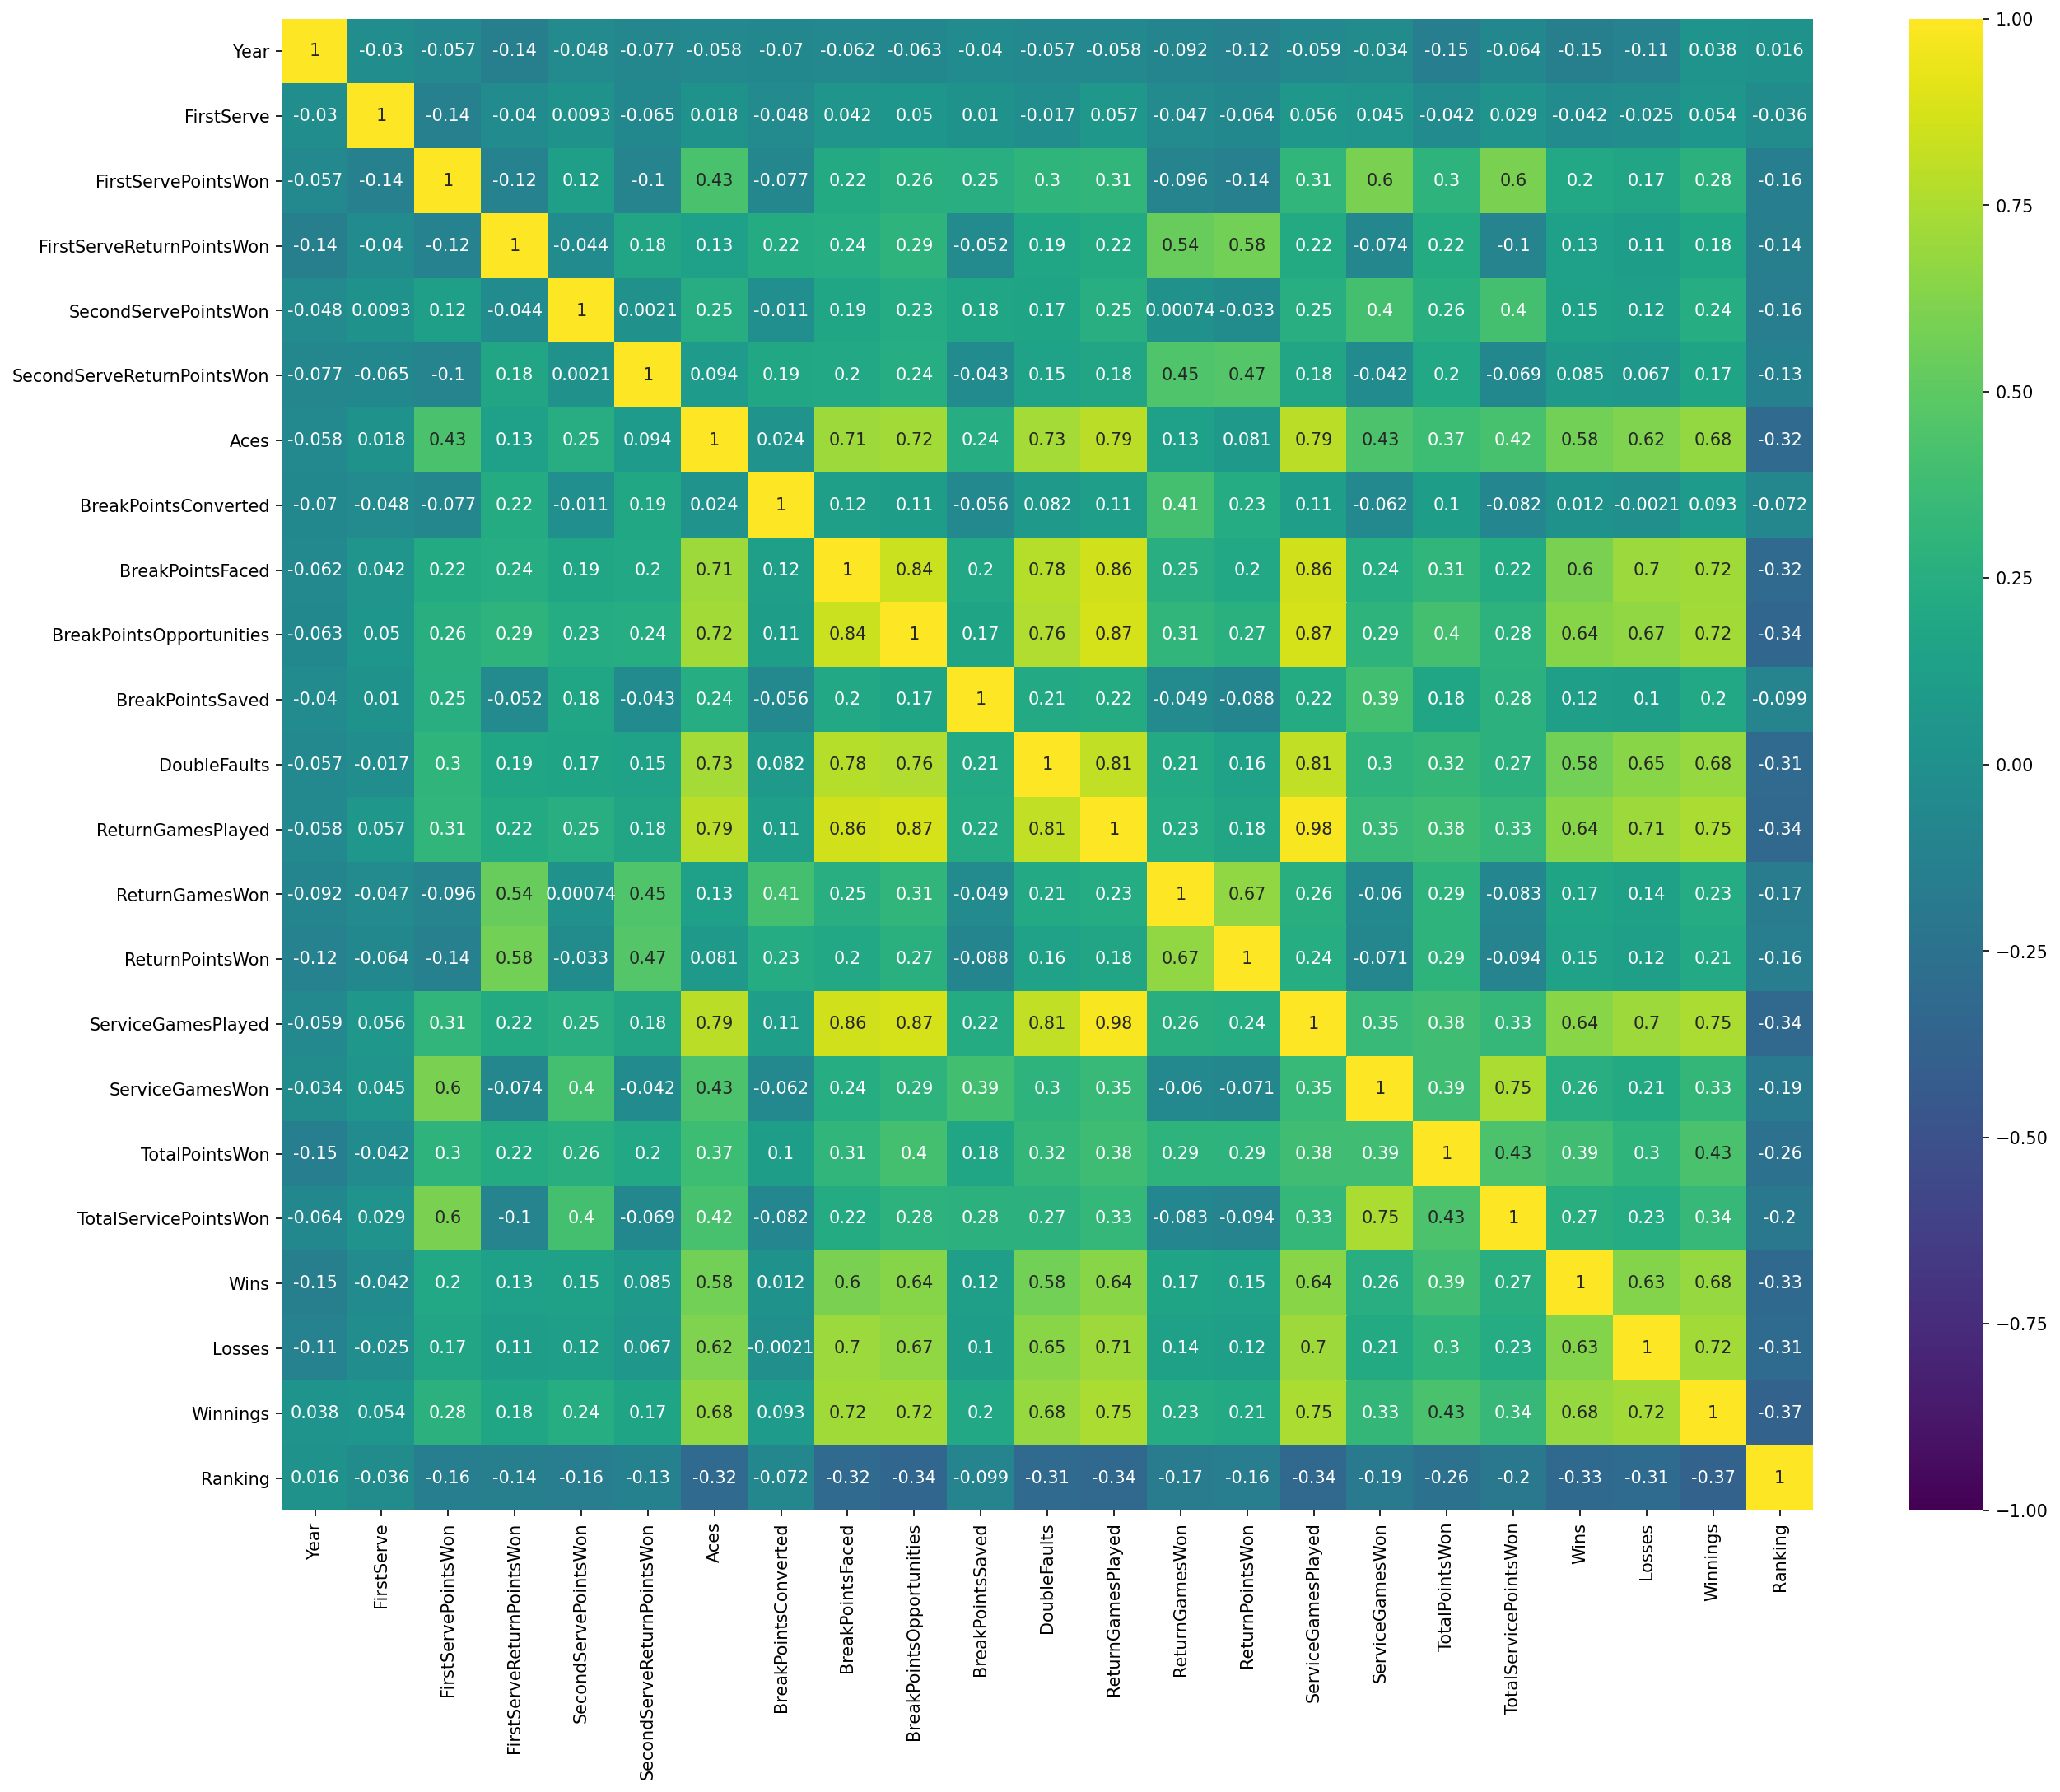

In [5]:
## Check correlation between attributes
corr_grid = df.corr(method='kendall')
plt.figure(figsize=(20,16), dpi=150)
sns.heatmap(
    corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns,
    vmin=-1, center=0, vmax=1, cmap='viridis', annot=True
)

Based on the heatmap,
1. `Winnings` ~ `Aces`, `BreakPointsFaced`, `BreakPointsOpportunities`, `DoubleFaults`, `ReturnGamesPlayed`, `ServiceGamesPlayed`, `TotalPointsWon`
2. `Wins` ~ `Aces`, `BreakPointsFaced`, `BreakPointsOpportunities`, `DoubleFaults`, `ReturnGamesPlayed`, `ServiceGamesPlayed`, `TotalPointsWon`

However, there could be multicolinearity between predicting features. We should ones some highly correlated with each other. To makes things easier, we should create another dataframe including only the features columns.

<AxesSubplot:>

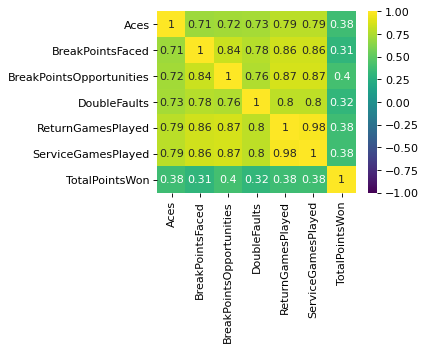

In [6]:
features = df.filter(
    ['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities',
     'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed', 'TotalPointsWon'])

corr_grid_2 = features.corr(method='kendall')
plt.figure(figsize=(4,3), dpi=80)
sns.heatmap(
    corr_grid_2, xticklabels=corr_grid_2.columns, yticklabels=corr_grid_2.columns,
    vmin=-1, center=0, vmax=1, cmap='viridis', annot=True
)

Since they are highly correlated, we should drop most features but `Aces` and `TotalPointsWon`. Also, we should pick some other features for different miltiple linear regresions including: `ServiceGamesWon`. 

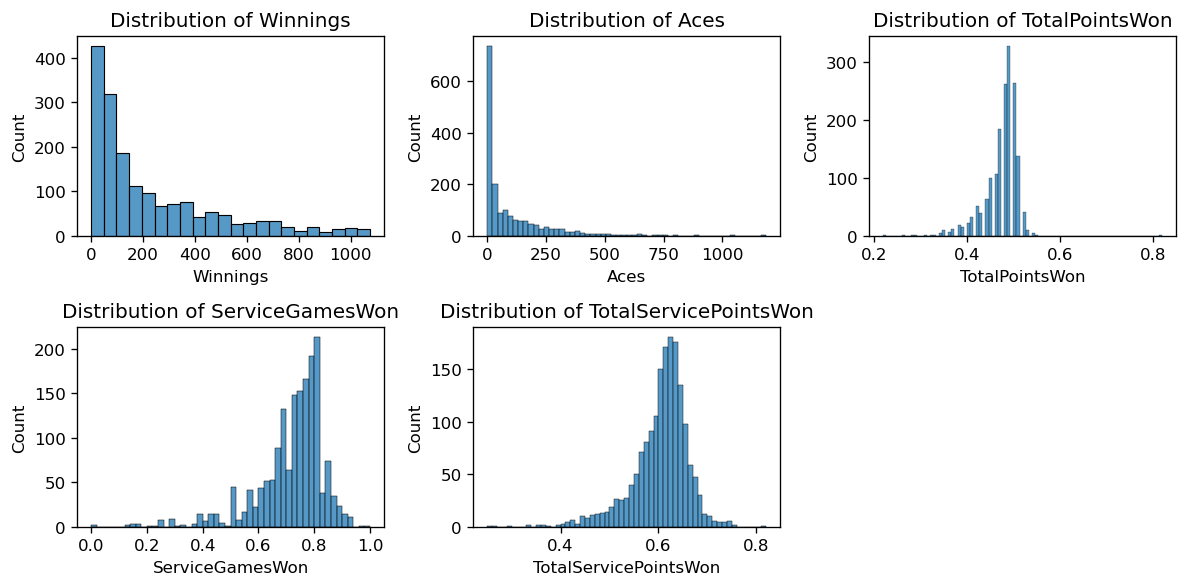

In [7]:
## check the distribution of winnings
plt.figure(figsize=(10,5), dpi=120)

dist_columns = ['Winnings', 'Aces', 'TotalPointsWon', 'ServiceGamesWon', 'TotalServicePointsWon']
i = 1
for column in dist_columns:
    plt.subplot(2,3,i)
    sns.histplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    i += 1

plt.tight_layout()

In [8]:
## Create dataframe for X, y
X = df[['Aces', 'TotalPointsWon', 'ServiceGamesWon', 'TotalServicePointsWon']]
y = df[['Winnings']]

transformer_x = PowerTransformer()
X_log = transformer_x.fit_transform(X)
transformer_y = PowerTransformer()
y_log = transformer_y.fit_transform(y)

In [9]:
## Split data for training and testing model
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, train_size=0.8, random_state=0)


## Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Evaluate the model using R Squared and Mean Squared Error (MSE)

In [10]:
## Predict the Winnings based on X_test
y_predicted = model.predict(X_test)

## Convert y_test and y_predicted back to their orginal scales
y_test_inversed = transformer_y.inverse_transform(y_test)
y_predicted_inversed = transformer_y.inverse_transform(y_predicted)

## Print R-squared and RSME to evaluate the model
print(f'R-squared: {r2_score(y_test_inversed, y_predicted_inversed)}')
mse = mean_squared_error(y_test_inversed, y_predicted_inversed)
rmse = math.sqrt(mse)
print(f'RMSE: {rmse}')

R-squared: 0.7206620887523326
RMSE: 128.45173155835417


The R-squared says that this model can explain rougly 72% of the variation in Winnings. Also, the 

In [11]:
## Model's intercept and coefficients
model.intercept_
model.coef_

array([[ 0.89612658,  0.1298076 , -0.0408736 , -0.17348907]])

#### Check if the assumptions of Linear Regression models are met

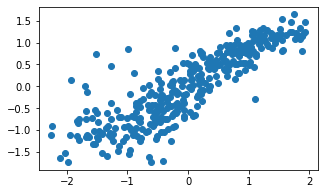

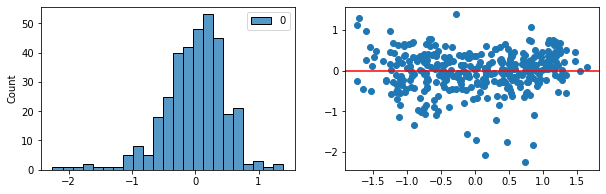

In [12]:
residuals = y_test - y_predicted

## Plot a scatter plot to check homoscedasticity
plt.figure(figsize=(5,3))
plt.scatter(y_test, y_predicted)

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
sns.histplot(residuals)

plt.subplot(1,2,2)
plt.scatter(y_predicted, residuals)
plt.axhline(y=0, c='red')

The distribution of residuals is quite normal, so the assumption of nomality is met. Moreover, the scatterplot indicates that the homoscedasticity is  met since residuals are symmetrically scattered around 0. Thus, this model pass all the assumptions.